In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
import time
from multiprocessing import Pool
import numpy as np

pd.set_option('display.float_format',lambda x: '%.2f' % x)




In [54]:
data = pd.read_csv('dataset\kc_house_data.csv')


data['date'] = pd.to_datetime(data['date'])

data['season'] = 'NA'

data['season'] = data['date'].apply( lambda x: 
                                    'smr' if ((x.month >= 6) and (x.month <=8 )) else # smr = summer
                                    'aut' if ((x.month >= 9) and (x.month <=11 )) else #aut = autumn
                                    'win' if ((x.month == 12) or (x.month <=2 ) )#win = winter                                 
                                    else 'spr' ) #spr = spring

df= data[['zipcode','price']].groupby('zipcode').median().reset_index()
df.columns=['zipcode','median_price']

df1=pd.merge(data,df, on='zipcode',how='inner').reset_index()

df1[['price','median_price']]

df1['status'] = df1.apply( lambda x: 
                         'compra'  if (x['price'] < x ['median_price']) & (x['condition'] >=3) & (x['waterfront']==1)
                          else 'não_compra', axis=1 )

df2=df1[['id','zipcode','price','median_price','condition','status']]

#for i in range (len(df1)):
#    if (df1.loc [i,'price'] < df1.loc [i,'median_price']) and (df1.loc [i,'condition'] >=2):
#        df1.loc[i,'status'] = 'compra'
#    else:
#        df1.loc[i,'status'] = 'nao_compra'


#- Agrupar os
#imóveis por região ( zipcode ) e por
#sazonalidade ( Summer, Inter ) -- e tamanho 
#- Vou sugerir os imóveis que estão
#abaixo do preço mediano da região e que estejam e boas
#condições e vista para água.

In [55]:
df1['sell_price'] = df1.apply( lambda x: 
                         x['price']+(x['price']*0.30)  if x['price'] < x ['median_price']
                          else x['price']+(x['price']*0.10), axis=1 )

In [56]:
for i in range (len(df1)):
    if 1==1:
        df1.loc[i,'profit'] = df1.loc[i,'sell_price'] - df1.loc[i,'price'] 
  

In [57]:
df3=df1[['id','zipcode','season','median_price','price','sell_price','profit']]

df3.rename(columns={'price': 'buy_price'}, inplace = True)

#df3[['id','zipcode','season','median_price','buy_price','sell_price','profit']]

C:\Users\User\AppData\Local\Temp\ipykernel_7072\4158019982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'price': 'buy_price'}, inplace = True)


In [58]:
df3.head()

,id,zipcode,season,median_price,buy_price,sell_price,profit
0,7129300520,98178,aut,278277.00,221900.00,288470.00,66570.00
1,4060000240,98178,smr,278277.00,205425.00,267052.50,61627.50
2,4058801670,98178,smr,278277.00,445000.00,489500.00,44500.00
3,2976800796,98178,aut,278277.00,236000.00,306800.00,70800.00
4,6874200960,98178,win,278277.00,170000.00,221000.00,51000.00


# cod | regiao | temporada | preço medio | preco compra | preco venda | lucro

In [59]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'season'],
      dtype='object')

In [60]:
#H1: Imóveis que possuem vista para água, são 30% mais caros, na média

In [61]:
houses=data[['waterfront','price']].groupby('waterfront').mean().reset_index()
y=houses.loc[0,'price']*0.30

if (houses.loc[0,'price']+y) < houses.loc[1,'price']: 
    x=  int(( houses.loc[0,'price'] * 100) /houses.loc[1,'price']  )
    
    print("As casas que possuem vista para agua são {} % mais caros na média do que as que não possuem vista para agua ".format(x))
else:
     print("As casas que não possuem vista para agua são mais caros (ou iguais) na média do que as que possuem vista para agua ")    

      
 

As casas que possuem vista para agua são 31 % mais caros na média do que as que não possuem vista para agua 


In [62]:
# H2: Imóveis com data de construção menor que 1955, são
# 50% mais baratos, na média.

In [63]:
houses=data[['yr_built','price']].groupby('yr_built').mean().reset_index()


In [70]:
cont=0
cont1=0
for i in range (len(houses)):
    if houses.loc[i,'yr_built'] < 1955:
            x = houses.loc[i,'price']
            cont=cont+1      
    if houses.loc[i,'yr_built'] >= 1955:        
            x1 = houses.loc[i,'price']
            cont1=cont1+1

x=  x/cont
x1= x1/cont1
print(x, " ", x1)
    
if x < x1*0.5:
    print("as casas construidas antes de 1955 são 50% (ou mais) baratas que as construidas apos 1955")
else:
    print("as casas construidas antes de 1955 são 50% (ou mais) baratas que as construidas apos 1955")

x= x= int(((x1 - x) *100)/x)

print("as mais novas sao {}% mais caras ".format(x))
                

8248.616751117734   12455.494391716999
as casas construidas antes de 1955 são 50% (ou mais) baratas que as construidas apos 1955
as mais novas sao 51% mais caras 


In [65]:
# H3: Imóveis sem porão possuem sqrt_lot, são 50%
# maiores do que com porão.

In [66]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'season'],
      dtype='object')

In [72]:
houses=data[['sqft_lot','sqft_basement']].groupby('sqft_basement').mean().reset_index()

In [73]:
cont1=0
for i in range (len(houses)):
    if houses.loc[i,'sqft_basement'] == 0:
            x = houses.loc[i,'sqft_lot']              
    if houses.loc[i,'sqft_basement'] > 0:        
            x1 = houses.loc[i,'sqft_lot']
            cont1=cont1+1
x=  x
x1= x1/cont1

print(x, " ", x1)
    
if x < x1*0.5:
    print("as que não possuem poram são 50%(ou mais) maiores na média do que as que possuem")
else:   
    x= int(((x - x1) *100)/x1)
    print(x)
  
    print("os que possuem poram são {}% maiores ".format(x))

16284.176824622886   42.84590163934426
37906
os que possuem poram são 37906% maiores 


# H4: o crescimento do preço dos imóveis yoy (year over year) é de 10%

In [17]:
houses=data[['price','date']].reset_index()

In [18]:
for i in range (len(houses)):
        if 1 == 1 :
            houses.loc[i,'year']=houses.loc[i,'date'].year
            houses.loc[i,'month']=houses.loc[i,'date'].month

In [19]:
a = houses['year'].unique

In [20]:
print(a)

<bound method Series.unique of 0       2014.00
1       2014.00
2       2015.00
3       2014.00
4       2015.00
          ...  
21608   2014.00
21609   2015.00
21610   2014.00
21611   2015.00
21612   2014.00
Name: year, Length: 21613, dtype: float64>


In [51]:
casa=pd.DataFrame()
casa1=pd.DataFrame()
for a in range (len(houses)):
    
    if(houses.loc[a,'date'].year == 2015) and (houses.loc[a,'date'].month == 4):
        casa.loc[a,'month']=houses.loc[a,'date'].month
        casa.loc[a,'year']=houses.loc[a,'date'].year
        casa.loc[a,'price']=houses.loc[a,'price']

    if(houses.loc[a,'date'].year == 2015-1) and (houses.loc[a,'date'].month == 5):
        casa1.loc[a,'month']=houses.loc[a,'date'].month
        casa1.loc[a,'year']=houses.loc[a,'date'].year
        casa1.loc[a,'price']=houses.loc[a,'price']

casa=casa[['price','year']].groupby('year').mean().reset_index()
casa1=casa1[['price','year']].groupby('year').mean().reset_index()

if casa.loc[0,'price'] > casa1.loc[0,'price']:
    x= (int(((casa['price']-casa1['price']) *100)/(casa1['price'])))
    print("as casas mais novas são {}% mais caras ".format(x))

if casa.loc[0,'price'] < casa1.loc[0,'price']:
    x= (int(((casa1['price']-casa['price']) *100)/(casa['price'])))
    print("as casas mais velhas são {}% mais caras ".format(x))


as casas mais novas são 2% mais caras 


w = pd.concat([casa,casa1]).reset_index()

In [48]:
print (casa)
print (casa1)

     year     price
0 2015.00 561837.77
     year     price
0 2014.00 548080.28


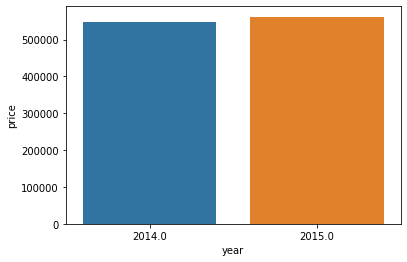

In [47]:
ax = sns.barplot(x="year", y="price", data=w)

# H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%